Identitas Diri       
    Nama : Aditya Herdiansyah Putra    
    NIM  : A11.2021.13948

# Judul

Pengujian Kelayakan Air berdasarkan zat yang terkandung dengan metode Klasifikasi.

# Deskripsi


Pada proyek akhir ini, saya akan melakukan pengolahan data berguna untuk menguji kelayakan air berdasarkan zat yang terkandung dengan metode klasifikasi. Pada pengolahan data ini, saya menggunakan dataset yang diambil dari salah satu website yaitu www.kagle.com dengan judul water potability.            

Dataset water potability adalah kumpulan data yang berisi informasi tentang kualitas air dari berbagai sumber air, seperti sungai, danau, atau sumur. Setiap baris dalam dataset ini mewakili satu sampel air dan berisi berbagai atribut yang menggambarkan komposisi kimia air tersebut. Dataset ini biasanya mencakup berbagai parameter dan zat-zat kimia yang mempengaruhi potabilitas air, yaitu kemampuan air tersebut aman dan cocok untuk diminum oleh manusia.       

Dataset ini terdiri dari beberapa atribut dan label yang terdiri dari :        
1. **pH** (Potensi Hidrogen): pH mengukur tingkat keasaman atau alkalinitas suatu larutan.
2. **Hardness** (Kekerasan): Kekerasan air merujuk pada kandungan mineral seperti kalsium dan magnesium.
3. **Solids** (Padatan Terlarut): Konsentrasi padatan terlarut dalam air dapat memberikan wawasan tentang kualitas air. 
4. **Chloramines** (Kloramina): Kloramina adalah senyawa yang dibentuk ketika klorin berikatan dengan amonia dalam air. 
5. **Sulfate** (Sulfat): Konsentrasi sulfat dalam air dapat bermanfaat dalam membangun model yang berhubungan dengan kualitas air atau lingkungan yang terpengaruh oleh sulfat.
6. **Conductivity** (Konduktivitas): Konduktivitas listrik air dapat memberikan informasi tentang jumlah ion dalam air. 
7. **Organic_carbon** (Karbon Organik): Kandungan karbon organik dalam air dapat memberikan wawasan tentang polusi organik. 
8. **Trihalomethanes** (Trihalometana): Trihalometana adalah senyawa yang terbentuk saat klorin bertindak pada materi organik dalam air.
9. **Turbidity** (Kekeruhan): Kekeruhan air menggambarkan sejauh mana partikel padat mengganggu transparansi air.
10. **Potability** (Kemampuan Air Minum): Ini mungkin merupakan target atau label dalam model machine learning. Potability air mengindikasikan apakah air aman untuk diminum. Model dapat dibangun untuk memprediksi potabilitas berdasarkan fitur-fitur lainnya.

# Import Library  
 

In [188]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Import Dataset

In [189]:
# Membaca dataset
data = pd.read_csv("water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Melihat Ukuran Dataset

In [190]:
data.shape

(3276, 10)

# Mengecek Tipe Data

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#  Deskripsi Statistik

In [192]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Pengecekan Missing Value

In [193]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Pengecekan jumlah data yang duplikat

In [194]:
model_data[model_data.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [195]:
model_data.duplicated().sum()

0

# Pengecekan Jumlah Label yang akan diuji

0    1998
1    1278
Name: Potability, dtype: int64


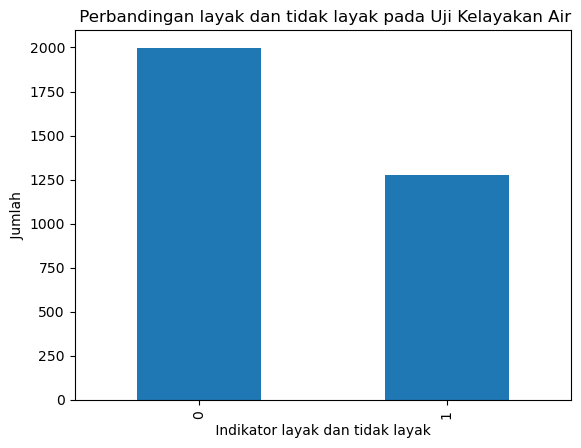

In [196]:
model_data["Potability"].value_counts().plot(kind="bar")
plt.title(" Perbandingan layak dan tidak layak pada Uji Kelayakan Air")
plt.xlabel(" Indikator layak dan tidak layak ")
plt.ylabel(" Jumlah ")
print(model_data["Potability"].value_counts())

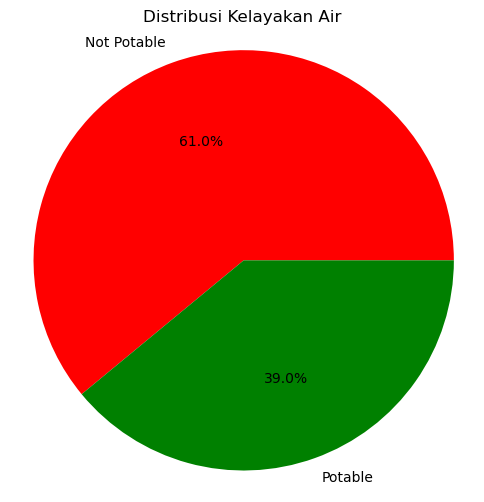

In [197]:
# Menghitung jumlah data pada setiap kategori potabilitas
potability_counts = model_data['Potability'].value_counts()

# Membuat diagram pie untuk visualisasi distribusi potabilitas
plt.figure(figsize=(6, 6))
plt.pie(potability_counts, labels=['Not Potable', 'Potable'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Distribusi Kelayakan Air')
plt.axis('equal')
plt.show()

# Pre-Processing Data

# Mengisikan Missing Value dengan Mean

In [198]:
# Menghitung nilai mean dari setiap kolom numerik
mean_values = data.mean()

# Mengisi missing value dengan nilai mean
data_filled = data.fillna(mean_values)

model_data = data_filled.round(1)
model_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.1,204.9,20791.3,7.3,368.5,564.3,10.4,87.0,3.0,0
1,3.7,129.4,18630.1,6.6,333.8,592.9,15.2,56.3,4.5,0
2,8.1,224.2,19909.5,9.3,333.8,418.6,16.9,66.4,3.1,0
3,8.3,214.4,22018.4,8.1,356.9,363.3,18.4,100.3,4.6,0
4,9.1,181.1,17979.0,6.5,310.1,398.4,11.6,32.0,4.1,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.7,193.7,47581.0,7.2,359.9,526.4,13.9,66.7,4.4,1
3272,7.8,193.6,17329.8,8.1,333.8,392.4,19.9,66.4,2.8,1
3273,9.4,175.8,33155.6,7.4,333.8,432.0,11.0,69.8,3.3,1
3274,5.1,230.6,11983.9,6.3,333.8,402.9,11.2,77.5,4.7,1


In [199]:
model_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Pengecekan rata rata masing masing atribut berdasarkan potability

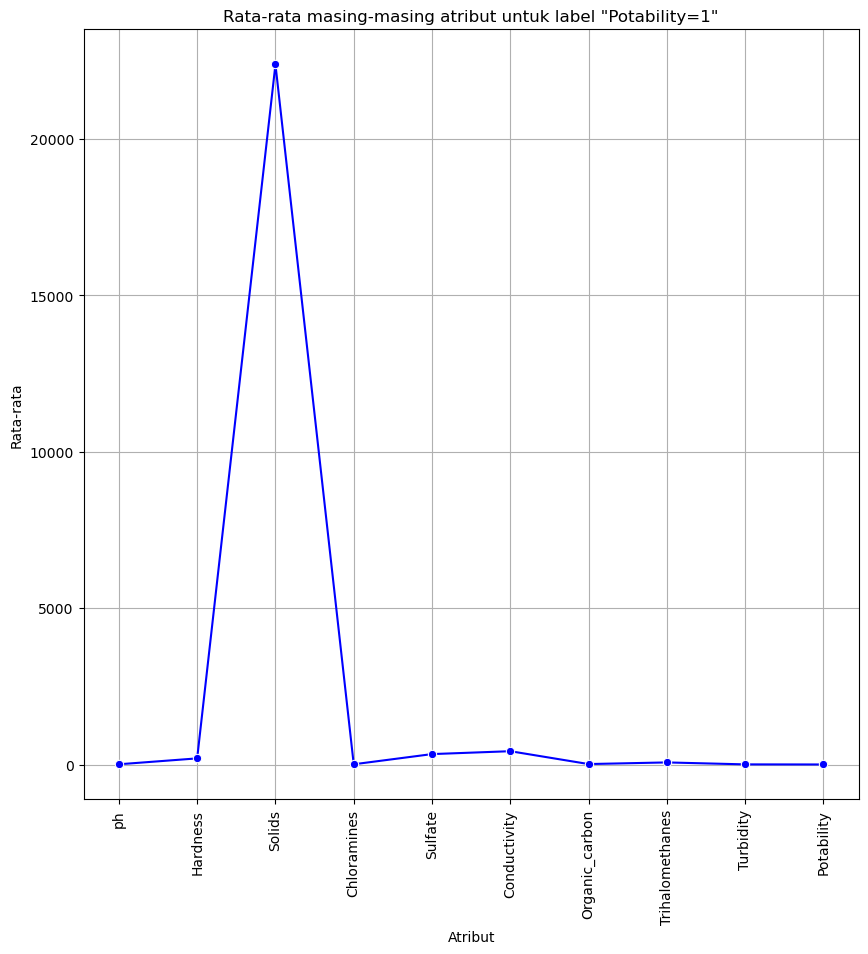

In [200]:
# Menghitung rata-rata masing-masing atribut berdasarkan label "Potability=1"
mean_potability_1 = model_data[model_data['Potability'] == 1].mean()
# Melakukan visualisasi menggunakan line plot
plt.figure(figsize=(10, 10))  # Ubah ukuran plot sesuai kebutuhan
sns.lineplot(x=mean_potability_1.index, y=mean_potability_1.values, marker='o', color='b')
plt.title('Rata-rata masing-masing atribut untuk label "Potability=1"')
plt.xlabel('Atribut')
plt.ylabel('Rata-rata')
plt.xticks(rotation=90)
plt.grid(True)  # Tambahkan grid pada plot
plt.show()

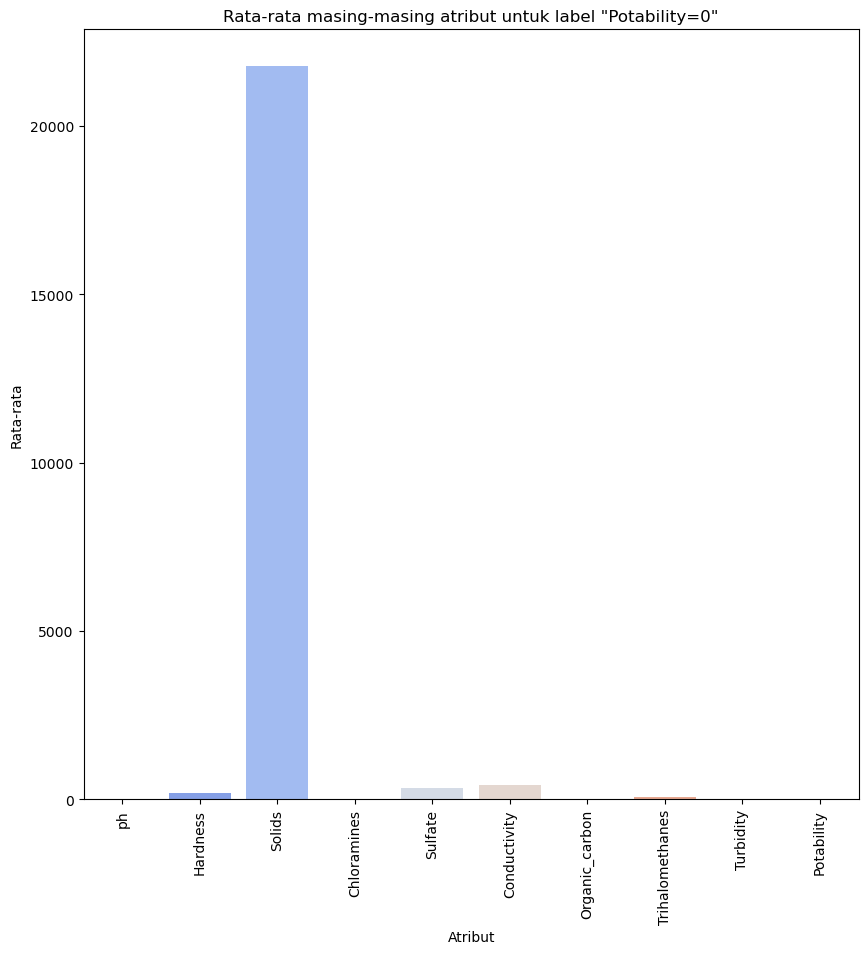

In [208]:
# Menghitung rata-rata masing-masing atribut berdasarkan label "Potability=0"
mean_potability_0 = model_data[model_data['Potability'] == 0].mean()

# Melakukan visualisasi menggunakan barplot
plt.figure(figsize=(10, 10))
sns.barplot(x=mean_potability_0.index, y=mean_potability_0.values, palette='coolwarm')
plt.title('Rata-rata masing-masing atribut untuk label "Potability=0"')
plt.xlabel('Atribut')
plt.ylabel('Rata-rata')
plt.xticks(rotation=90)
plt.show()

# Klasifikasi dengan Metode Naive Bayes
Menguji keakurasian dari dataset Water_Potability.csv dengan menggunakan metode Naive Bayes yang telah di Oversampling dengan SMOTE

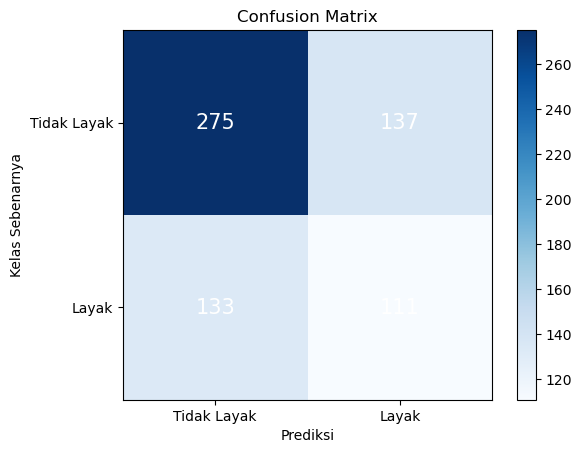

Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Layak       0.67      0.67      0.67       412
       Layak       0.45      0.45      0.45       244

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656

Detail Akurasi : 0.5884146341463414


In [202]:
X = md.drop("Potability", axis=1)
y = md["Potability"]

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menerapkan SMOTE untuk oversampling pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Membuat objek klasifikasi Naive Bayes
nb_classifier = GaussianNB()

# Melatih model dengan data latih yang telah dioversampling
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Memprediksi label untuk data uji
y_pred = nb_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat visualisasi confusion matrix
confusion = confusion_matrix(y_test, y_pred)

plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.xticks([0, 1], ['Tidak Layak', 'Layak'])
plt.yticks([0, 1], ['Tidak Layak', 'Layak'])

# Menampilkan angka pada sel matriks
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='white', fontsize=15)

plt.title('Confusion Matrix')
plt.show()

# Membuat visualisasi laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak'])
print("Laporan Klasifikasi:\n", report)
print ("Detail Akurasi :", accuracy)

# Klasifikasi dengan metode Random Forest 
Menguji keakurasian dari dataset Water_Potability.csv dengan menggunakan metode Random Forest yang telah di Oversampling dengan SMOTE

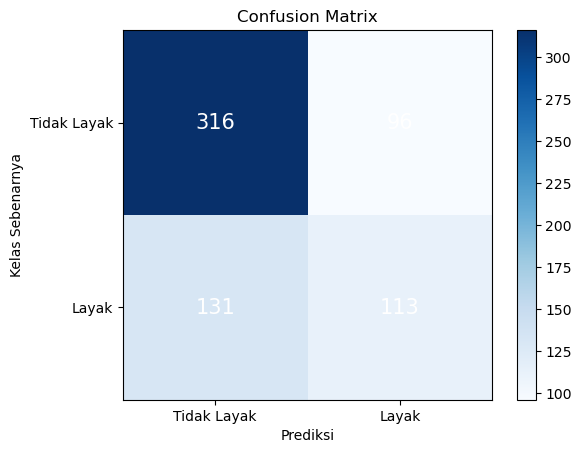

Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Layak       0.71      0.77      0.74       412
       Layak       0.54      0.46      0.50       244

    accuracy                           0.65       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.65      0.65      0.65       656

Detail Akurasi : 0.6539634146341463


In [203]:
from sklearn.ensemble import RandomForestClassifier

X = md.drop("Potability",axis=1)
y = md["Potability"]

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Membuat objek klasifikasi Random Forest
rf_classifier = RandomForestClassifier()

# Melatih model dengan data latih yang telah dioversampling
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Memprediksi label untuk data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
# Membuat visualisasi confusion matrix
confusion = confusion_matrix(y_test, y_pred)

plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.xticks([0, 1], ['Tidak Layak', 'Layak'])
plt.yticks([0, 1], ['Tidak Layak', 'Layak'])

# Menampilkan angka pada sel matriks
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='white', fontsize=15)

plt.title('Confusion Matrix')
plt.show()

# Membuat visualisasi laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak'])
print("Laporan Klasifikasi:\n", report)
print ("Detail Akurasi :", accuracy)

# Klasifikasi dengan Metode  K-Nearest Neighbor
Menguji keakurasian dari dataset Water_Potability.csv dengan menggunakan metode KNN yang telah di Oversampling dengan SMOTE

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


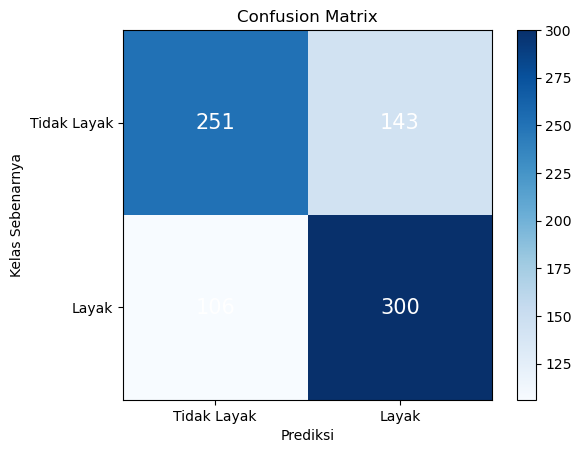

Laporan Klasifikasi:
               precision    recall  f1-score   support

 Tidak Layak       0.70      0.64      0.67       394
       Layak       0.68      0.74      0.71       406

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800

Detail Akurasi : 0.68875


In [204]:
from sklearn.neighbors import KNeighborsClassifier

X = md.drop("Potability",axis=1)
y = md["Potability"]

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Membagi dataset yang telah dioversample menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat objek klasifikasi KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data latih yang telah dioversample
knn_classifier.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = knn_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat visualisasi confusion matrix
confusion = confusion_matrix(y_test, y_pred)

plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.xticks([0, 1], ['Tidak Layak', 'Layak'])
plt.yticks([0, 1], ['Tidak Layak', 'Layak'])

# Menampilkan angka pada sel matriks
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='white', fontsize=15)

plt.title('Confusion Matrix')
plt.show()

# Membuat visualisasi laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak'])
print("Laporan Klasifikasi:\n", report)

print ("Detail Akurasi :", accuracy)

# Pemilihan Metode Terbaik
Jika kita amati pada ketiga metode yang saya gunakan untuk menguji keakurasian dari dataset yang saya gunakan yaitu water_potability.csv.            
          
Pada metode pertama saya menggunakan Naive Bayes dengan Oversampling yang mana menghasilkan tingkat kekurasian 0.5884146341463414

Pada metode kedua saya menggunakan Decision Tree dengan Oversampling yang menghasilkan tingkat ke akurasian 0.6539634146341463     
        
Pada metode ketiga saya menggunakan KNN dengan Oversampling yang menghasilkan tingkat keaurasian 0.68875     
     
Dengan begitu, dapat dipastikan bahwa pada machine learning ini akan menggunakan metode ketiga yaitu KNN dengan Oversampling.

# Memprediksi Inputan Baru dengan metode KNN

In [205]:
# Fungsi untuk memprediksi inputan baru
def predict_new_input(input_data):
    # Normalisasi input data
    input_data = np.array(input_data).reshape(1, -1)
    input_data = scaler.transform(input_data)
    # Lakukan prediksi
    prediction = knn_classifier.predict(input_data)
    # Ubah hasil prediksi menjadi "Layak" atau "Tidak Layak"
    result = "Air Layak untuk Dikonsumsi" if prediction[0] == 1 else "Air Tidak layak untuk Dikonsumsi"
    return result

In [206]:
# Uji coba dengan inputan data baru
new_input = [7.1, 204.9, 20791.3, 7.3, 368.5, 564.3, 10.4, 87.0, 3.0]
result = predict_new_input(new_input)
print("Hasil prediksi untuk input baru:", result)
accuracy

Hasil prediksi untuk input baru: Air Layak untuk Dikonsumsi


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.68875

In [207]:
# Uji coba dengan inputan data baru
new_input = [13, 167.4, 20457.5, 5.2, 349.9, 339.3, 6.2, 68.0, 2.0]
result = predict_new_input(new_input)
print("Hasil prediksi untuk input baru:", result)
accuracy

Hasil prediksi untuk input baru: Air Tidak layak untuk Dikonsumsi


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.68875

# Kesimpulan 
Dari pengujian kelayakan air ini saya menggunakan dataset water_potability.csv yang diambil dari www.kagle.com. Dataset ini memiliki atribut berupa ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon,Trihalomethanes, Turbidity, Dan juga memiliki label yaitu Potability. Dataset ini masih terdapat beberpa data yang missing value dan kemudian perlu dilakukan pengisian data kosong tersebut dengan cara mengisikan dengan nilai mean dari masing masing atribut. Setelahnya dilakukan pengecekan untuk mengetahui keseimbangan dari label Potability. Ternyata setelah dilakukan pengecekan, dapat diketahui bahwa label dengan nilai 0 lebih tinggi dibandingkan dengan label dengan nilai 1 dengan perbandingan 1998:1278 atau 61% : 39%.  

Kemudian sebab itu, perlu dilakukan suatu tahap percobaan yaitu dengan cara melakukan oversampling. Pada kasus ini, saya melakukan oversampling dengan 3 metode yang berbeda. Metode pertama yaitu Naive Bayes, kedua Random Forest, dan yang ketiga adalah K-Nearest Neighbor (KNN). Kemudian pada saya melakukan oversampling dengan menggunakan SMOTE pada setiap metode yang saya gunakan. Lalu yang selanjutnya adalah  saya mengklasifikasikan dataset dengan membagi dengan skala 0.2 sebagai data test atau 20% data tes dan 80% untuk data training.          
              
              
Pada tahap klasifikasi tersebut, masing masing metode menghasilkan tingkat akurasi yang berbeda beda. Untuk penggunaan metode Naive Bayes menghasilkan akurasi **0.5884146341463414**. Untuk metode yang kedua yaitu random forest menghasilkan tingkat akurasi sebesar **0.6539634146341463**. Dan metode yang ketiga yaitu K-Nearest Neighbor (KNN) menghasilkan tingkat akurasi sebesar **0.68875**. Dari hasil masing masing pengujian tersebut, dapat dikatakan metode K-Nearest Neighbor (KNN) memiliki tingkat akurasi yang lebih tinggi dibandingkan dengan metode lain yang digunakan. Maka untuk melakukan pengujian kelayakan air saya memutuskan untuk menggunakan metode K-Nearest Neighbor (KNN).        

Selanjutnya, untuk melakukan pengujian terhadap kelayakan air berdasarkan zat yang terkandung saya memasukkan fungsi untuk menguji dataset tersebut yang mana ketika saya menginputkan data baru akan diklasifikasikan dengan metode KNN untuk menghasilkan potability layak atau tidak layak. Dalam pengujian tersebut, hasil akurasi yang dihasilkan mencapai 0,69 atau 69%. Meskipun nilai tersebut masih kurang akurat, Namun data akurasi tersebut sudah memiliki peningkatan dibandingkan dengan sumber referensi jurnal yang saya dapatkan di internet. Jurnal tersebut menyebutkan pada dataset tersebut hanya memiliki akurasi pada metode K-Nearest Neighbor (KNN) sebesar 61.7% atau 0,617. 

# Referensi Jurnal
Kurra, Sai Sreeja dkk. (2022) "WATER QUALITY PREDICTION USING MACHINE LEARNING", 692-696. Diakses 4 Juli 2023, dari Andhra University College Of Engineering For Women, Andhra Pradesh, India.     
       
Astuti FD & Lenti FN. (2021) "Implementasi SMOTE untuk mengatasi Imbalance Class pada Klasifikasi Car Evolution menggunakan K-NN", 89-98. Diakses 11 Juli 2023, dari Informatika, STMIK AKAKOM, Yogyakarta.
         
Mutoffar MM dkk. (2022) "KLASIFIKASI KUALITAS AIR SUMUR MENGGUNAKAN ALGORITMA RANDOM FOREST", 138-146. Diakses 11 juli 2023, dari Program Studi Teknik Informatika,
Sekolah Tinggi Teknologi Bandung
